## pytorch workflows

In [24]:
import torch
from torch import nn # contains all diff types of neural networks
import matplotlib.pyplot as plt

# checking the pytorch version
torch.__version__

'2.5.1+cu124'

In [25]:
## data preparing and loading
## we are creating data with know parameters using linear regression and we will see if our model can estimate these parameters using gradient descend

# creating known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # x is capital because in ml input is generally a matrix or tensor and is represented by a capital letter
y = weight * X + bias




In [26]:
### splitting data into training and test sets
train_split = int(0.8*len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)


(40, 40, 10, 10)

In [27]:
## visualization
def plot_prediction(train_data = x_train,
                    train_lable = y_train,
                    test_data = x_test,
                    test_lables = y_test,
                    prediction = None):
  ## plots training data, test data and compares prediction

  plt.figure(figsize=(10,7))

  ## ploting training data in blue
  plt.scatter(train_data, train_lable, c="b", s=4, label="training data")

  ## plotting test data in green
  plt.scatter(test_data, test_lables, c="g", s=4, label="test data")

  ## plotting prediction
  if prediction is not None:
    plt.scatter(test_data, prediction, c="r", s=4, label="prediction")

  ## show the legend
  plt.legend(prop={"size":14})


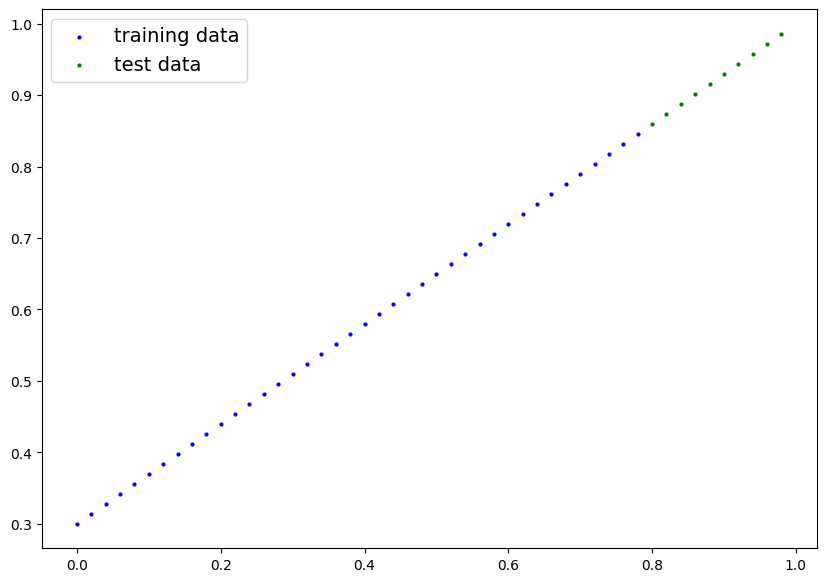

In [28]:
plot_prediction();

In [29]:
## building a model
# creating a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
   super().__init__()
   self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
   self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

   # forward function defines the computation in the model
  def forward(self, x :torch.tensor) -> torch.tensor:
      return self.weight*x + self.bias


In [30]:
torch.manual_seed(31)

model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weight', tensor([0.3519])), ('bias', tensor([-0.5683]))])

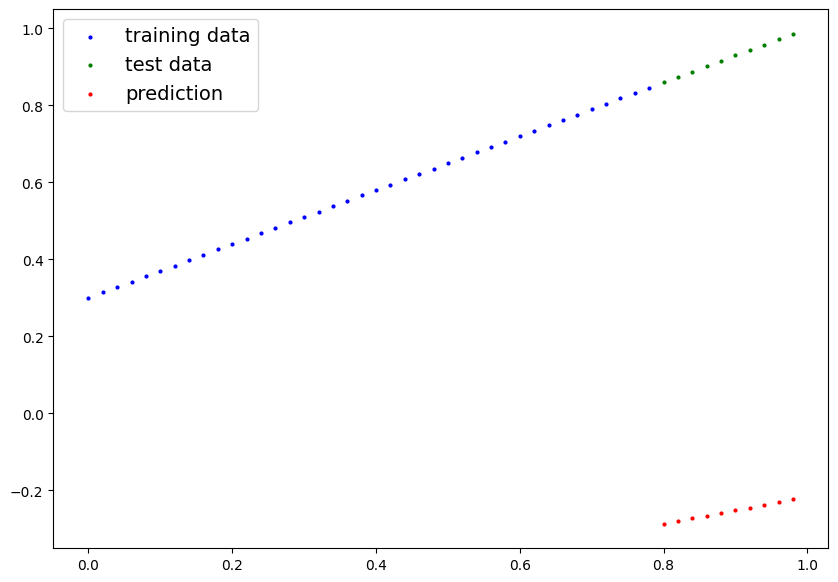

In [31]:
### making predictions using torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(x_test)

plot_prediction(prediction=y_preds)

In [32]:
## training our model
# one way to measure how bad our model predictions are we can use loss functions

# loss function
loss_fn = nn.L1Loss()
#optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # learning rate most imp hyperparamerte which we set ourselves

## training loop
0. loop through the data
1. forward pass => passing the data through the forward fuction to make predictions. It is also called forward propogation
2. calculate the loss
3. optimizer zero grad
4. loss backward - move backwards in the nn (backpropagation)
5. optimizer step - use optimizer to adjust our models parameters (gradient descent)

In [33]:
## building a training and testing loop

# an epoch is one loop through the data
epochs = 100 # this is a hyperparameter

epoch_count = []
loss_value =[]
test_loss_value =[]

#0. loop through  the data
for epoch in range(epochs):
  model_0.train() #train mode in pytroch set

  #forward pass
  y_pred = model_0(x_train)

  #calculating the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"loss: {loss}")

  # optimizer zero grad
  optimizer.zero_grad()

  # perform backward propogation
  loss.backward()

  # optimizer step
  optimizer.step()

  ## testing code

  model_0.eval() # turns off gradient tracking and other settings like dropout and batchnorm layers not needed for evaluation and testing
  with torch.inference_mode():
    # do the forward pass
    test_pred = model_0(x_test)
    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if(epoch %10 == 0):
    epoch_count.append(epoch)
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f"Epoch : {epoch} | loss : {loss} | test loss : {test_loss}")
    print(model_0.state_dict())


Epoch : 0 | loss : 1.0040756464004517 | test loss : 1.1646648645401
OrderedDict([('weight', tensor([0.3558])), ('bias', tensor([-0.5583]))])
Epoch : 10 | loss : 0.8888659477233887 | test loss : 1.0299547910690308
OrderedDict([('weight', tensor([0.3948])), ('bias', tensor([-0.4583]))])
Epoch : 20 | loss : 0.7736560106277466 | test loss : 0.8952450752258301
OrderedDict([('weight', tensor([0.4338])), ('bias', tensor([-0.3583]))])
Epoch : 30 | loss : 0.658446192741394 | test loss : 0.7605351805686951
OrderedDict([('weight', tensor([0.4728])), ('bias', tensor([-0.2583]))])
Epoch : 40 | loss : 0.5432361364364624 | test loss : 0.6258252263069153
OrderedDict([('weight', tensor([0.5118])), ('bias', tensor([-0.1583]))])
Epoch : 50 | loss : 0.4280261993408203 | test loss : 0.4911152720451355
OrderedDict([('weight', tensor([0.5508])), ('bias', tensor([-0.0583]))])
Epoch : 60 | loss : 0.31281620264053345 | test loss : 0.3564053177833557
OrderedDict([('weight', tensor([0.5898])), ('bias', tensor([0.

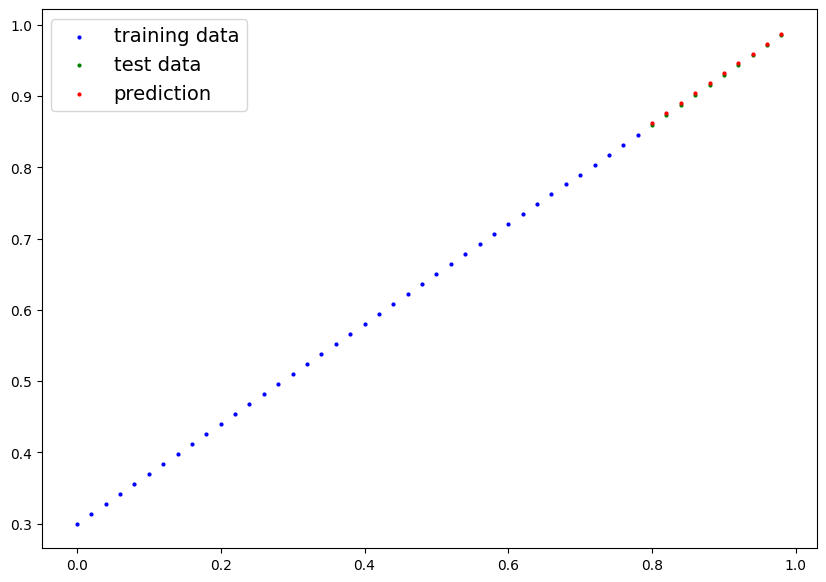

In [34]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

plot_prediction(prediction=y_preds_new)

In [35]:
import numpy as np
np.array(torch.tensor(loss_value).numpy()), np.array(torch.tensor(test_loss_value).numpy())

(array([1.0040756 , 0.88886595, 0.773656  , 0.6584462 , 0.54323614,
        0.4280262 , 0.3128162 , 0.19760628, 0.08239625, 0.00459616],
       dtype=float32),
 array([1.1646649 , 1.0299548 , 0.8952451 , 0.7605352 , 0.6258252 ,
        0.49111527, 0.35640532, 0.22169545, 0.08698546, 0.01156006],
       dtype=float32))

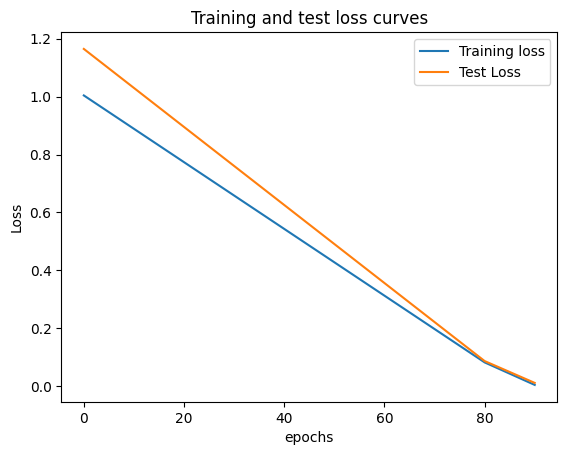

In [36]:
plt.plot(epoch_count,np.array(torch.tensor(loss_value).numpy()), label="Training loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_value).numpy()), label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

### Saving a model

In [36]:
# there are 3 main models of saving and loading a model in pytorch
# 1. torch.save()
# 2. torch.load()
# 3. torch.nn.module.load_state_dict()